**Regression**

We are going to apply regression model to the Automobile dataset which is availble at https://kaggle.com/roger1315/automobiles


Let's start with importing the libraries we will use.

In [1]:

import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

Then we will read the dataset. The dataset is about the automobiles's consumption of gasoline per mile (mpg) with some other features of the cars. The idea is to  predict the mpg of any car given some of the features of the cars.

Most of the columns in the dataset are numeric. There are only 2 categorical columns in the dataset which are 'origin' and 'car name'. The target value for the dataset we are planning to predict is the 'mpg' column.

Here is a sample from the dataset.

In [2]:
file_path = "/content/drive/My Drive/Datasets/auto-mpg.csv"
df = pd.read_csv(file_path)
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
272,23.8,4,151.0,85,2855,17.6,78,1,oldsmobile starfire sx
256,20.5,6,225.0,100,3430,17.2,78,1,plymouth volare
92,13.0,8,351.0,158,4363,13.0,73,1,ford ltd
324,40.8,4,85.0,65,2110,19.2,80,3,datsun 210
351,34.4,4,98.0,65,2045,16.2,81,1,ford escort 4w


As we see, there are 398 records available in the dataset. The dataset has 9 columns; one of them (mpg) is the target, while 6 numeric features and 2 categorical features.

In [3]:
# Total number of records and columns
df.shape

(398, 9)

Let's look into the data. As we see, some of the columns' datatype are object even though they are numeric values. The reason for this is that they contain some non-digit characcters (like '?'). First of all we need to check it and fix those records. 



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.replace('?', np.nan,inplace=True)


In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Let's see the nan values and decide whether to drop them or impute them. As we see there or only 6 records which contain nan values. We can go ahead and drop the nan values, since this  is a small number. Then we can convert the datatype of the horsepower to any of the numeric type since it is numeric in nature.

In [7]:
df[df['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [8]:
#  To drop the null records
df.dropna(inplace=True)

In [9]:
df['horsepower'] = df['horsepower'].astype('int32')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int32(1), int64(4), object(1)
memory usage: 29.1+ KB


Let's see the remaining dataset


In [11]:
df.shape

(392, 9)

We are going to drop the 'origin' and 'car name' fields since we beleive that they do not provide much information about the target value.

In [12]:
# To delete the irrelevant columns from the dataset
df.drop(labels=['origin','car name'], axis=1,inplace=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int32  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
dtypes: float64(3), int32(1), int64(3)
memory usage: 23.0 KB


In [14]:
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
195,29.0,4,85.0,52,2035,22.2,76
30,28.0,4,140.0,90,2264,15.5,71
235,26.0,4,97.0,75,2265,18.2,77
237,30.5,4,98.0,63,2051,17.0,77
234,24.5,4,151.0,88,2740,16.0,77


It is better to have an 'age' feature rather than model year. Let's convert the 'model year' to 'age'. Then we will drop the 'model year' since we will start using the 'age'.

In [15]:
df['model year'] = '19'+df['model year'].astype('str')
df['age'] = datetime.datetime.now().year-pd.to_numeric(df['model year'])
df.drop('model year', axis=1, inplace=True)
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
119,20.0,4,114.0,91,2582,14.0,47
261,18.1,6,258.0,120,3410,15.1,42
135,18.0,6,225.0,105,3613,16.5,46
245,36.1,4,98.0,66,1800,14.4,42
251,20.2,8,302.0,139,3570,12.8,42


Let's see some statistics about the data.

In [16]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,44.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,41.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,44.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


In [17]:
def plot_X_vs_Y(x,y, xlabel, ylabel):
  fig = plt.figure(figsize=(12,10))
  plt.scatter(x,y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title(xlabel+' Versus '+ ylabel)

Let's see the relation between age and mpg in order to better understand the data. There seems to be an existing relation between age and mpg. The older the car is, the less mpg value it has. (Older car consumes more gas)

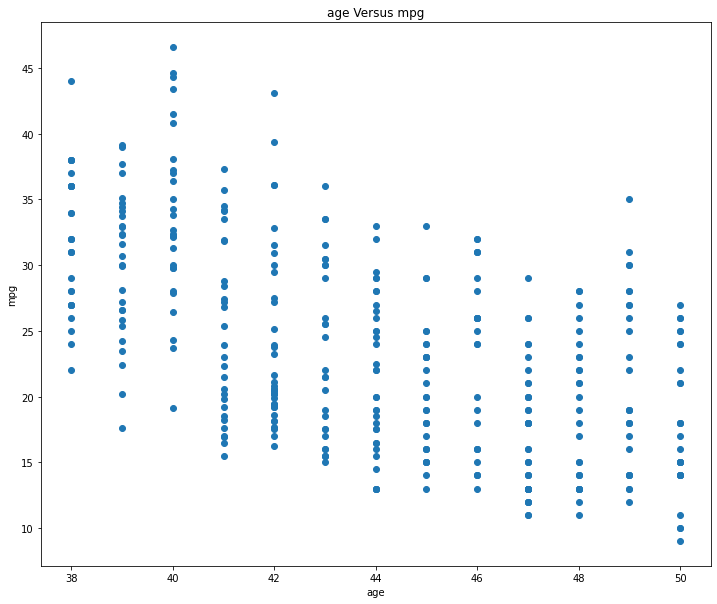

In [18]:
plot_X_vs_Y(df.age, df.mpg, 'age', 'mpg')

There seems to be a linear relation between the acceleration and mpg.

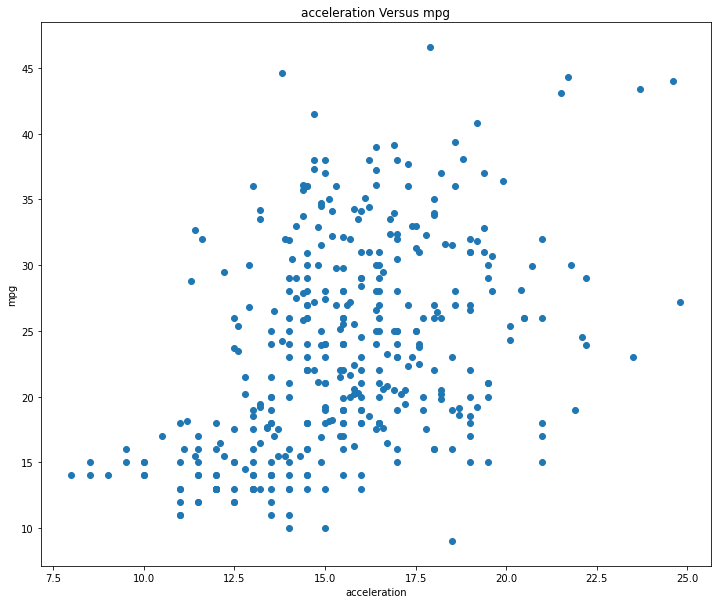

In [19]:
plot_X_vs_Y(df.acceleration, df.mpg,'acceleration','mpg')

There seems to be a negative relation between weight and mpg. Heavier the car is, the less mpg it has.

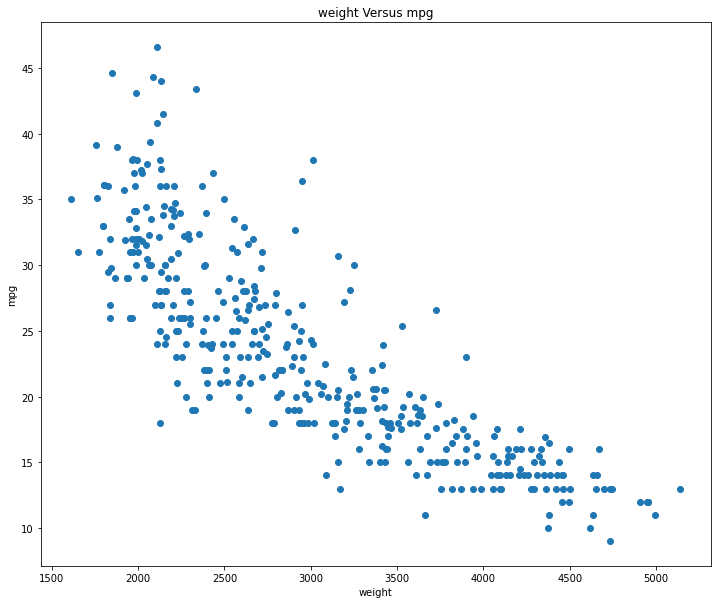

In [20]:
plot_X_vs_Y(df.weight, df.mpg, 'weight','mpg')

There is also a similar realtionship between displacement and mpg. The bigger the displacement is, the less mpg it has.

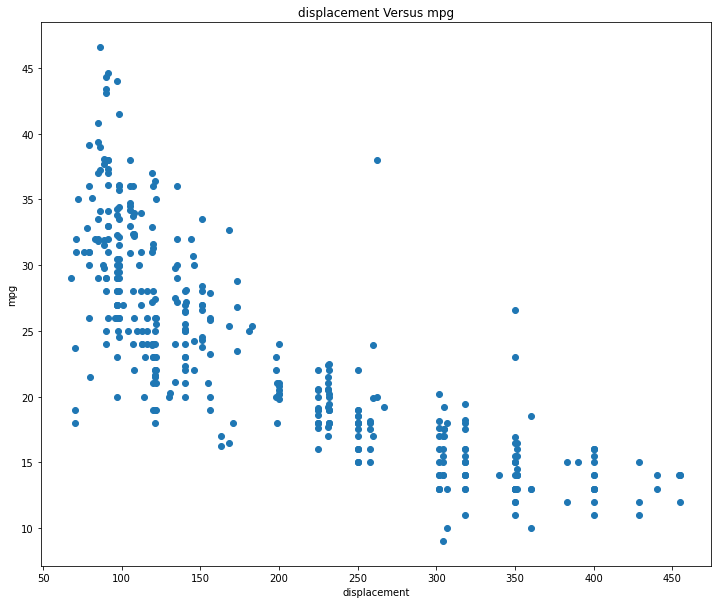

In [21]:
plot_X_vs_Y(df.displacement, df.mpg, 'displacement', 'mpg')

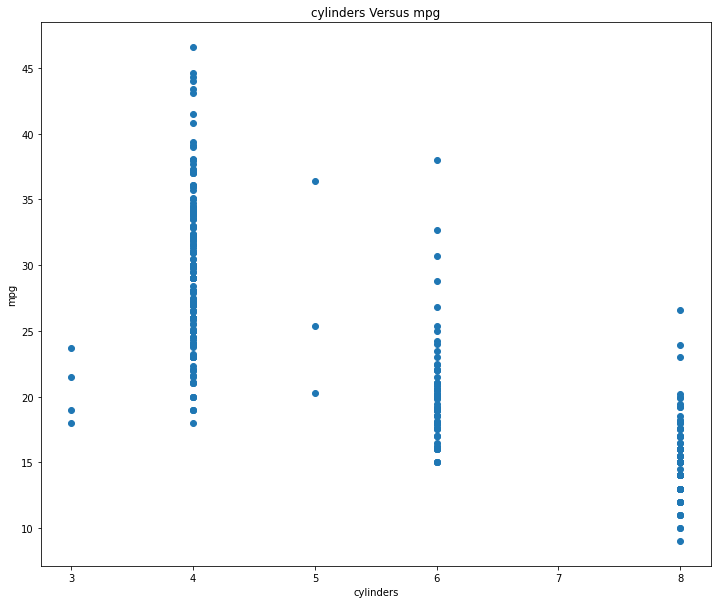

In [22]:
plot_X_vs_Y(df.cylinders, df.mpg, 'cylinders','mpg')

Let's check the coorelation matrix. Coorelation tells us about how the variables are related. As we see that mpg is coorelated with almost all of the features.


In [23]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


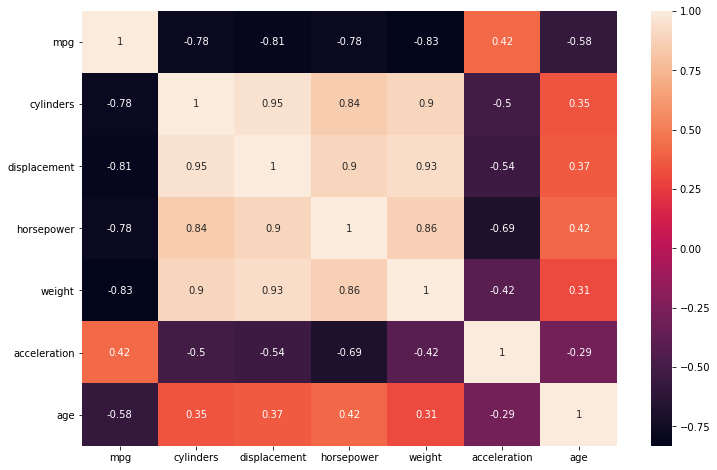

In [24]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

In [25]:
# Let's shuffle all of the dataset before modelling
df = df.sample(frac=1.0).reset_index(drop = True)

In [26]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,44.3,4,90.0,48,2085,21.7,40
1,16.0,8,304.0,150,3433,12.0,50
2,13.0,8,318.0,150,3755,14.0,44
3,32.9,4,119.0,100,2615,14.8,39
4,28.0,4,116.0,90,2123,14.0,49
5,37.0,4,91.0,68,2025,18.2,38
6,25.8,4,156.0,92,2620,14.4,39
7,20.2,6,200.0,88,3060,17.1,39
8,29.0,4,98.0,83,2219,16.5,46
9,13.0,8,350.0,145,3988,13.0,47


Let's create a function wehich we can utilize for modelling

In [27]:
def build_model(model, features, target, dataset):
  
  X = df[features]
  y = df[target]
  
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
  
  model.fit(X_train, y_train)
  predictors = X_train.columns
  coef = pd.Series(model.coef_, predictors).sort_values()  
  print(f'Intercept :\n{model.intercept_}\n')
  print(f'Coefficients :\n{coef}\n')
  print(f'Training score : {model.score(X_train, y_train)}')
  mse_training = mean_squared_error(y_train, model.predict(X_train), squared=True)
  print(f'MSE (training) : {mse_training}')



  y_pred = model.predict(X_test)
  print(f'Test score : {r2_score(y_test, y_pred)}')
  mse_test = mean_squared_error(y_test, y_pred, squared=True)
  print(f'MSE (test): {mse_test}')


  print()
  fig = plt.figure(figsize=(20,10))
  plt.plot(y_pred, label='Predicted')
  plt.plot(y_test.values, label='Actual')

  plt.ylabel('mpg')
  plt.title("Actual vs Predicted Target Values")

  plt.legend()

  plt.show()

**Simple Linear Regression**

We will apply simple regression with one feature and target values for modelling and prediction for different set of features.


Normalization data gives you better results if you normalize your numeric values in ML models. Normalization scales all numeric features to be between 0 and 1. Having features in the same scale can vastly improve the performance of your ML model. That is why you need to set normalize=True while creating the LinerarRegression estimator.

R2 is the measure of how well our model captures the underlying variation in our training data.

Intercept :
40.23893398264532

Coefficients :
horsepower   -0.158438
dtype: float64

Training score : 0.6090037873349892
MSE (training) : 25.332073942653786
Test score : 0.5819143606981954
MSE (test): 18.733670556739217



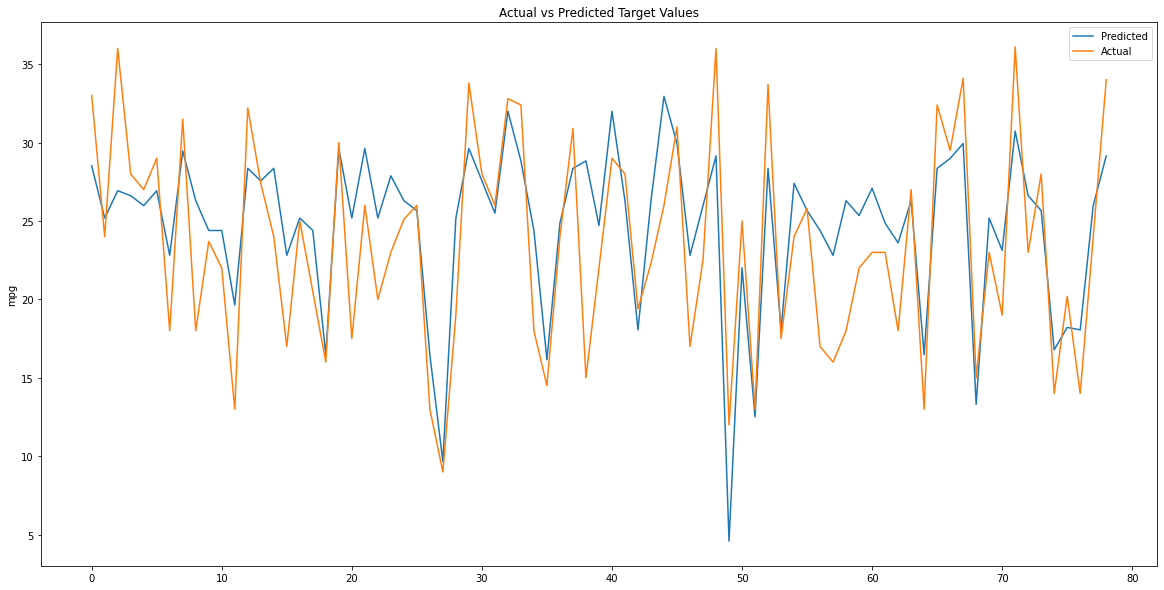

In [28]:
clf = LinearRegression(normalize=True)
build_model(clf, ['horsepower'],'mpg', df)

**Multiple Linear Regression**

We will include all the features in the model as predictors and take 'mpg' as target value.

Intercept :
76.60841218937294

Coefficients :
age            -0.759854
cylinders      -0.193813
weight         -0.007571
horsepower     -0.002768
displacement    0.011568
acceleration    0.120434
dtype: float64

Training score : 0.8006039537248681
MSE (training) : 11.825425325144295
Test score : 0.8273278534012113
MSE (test): 11.071287061547155



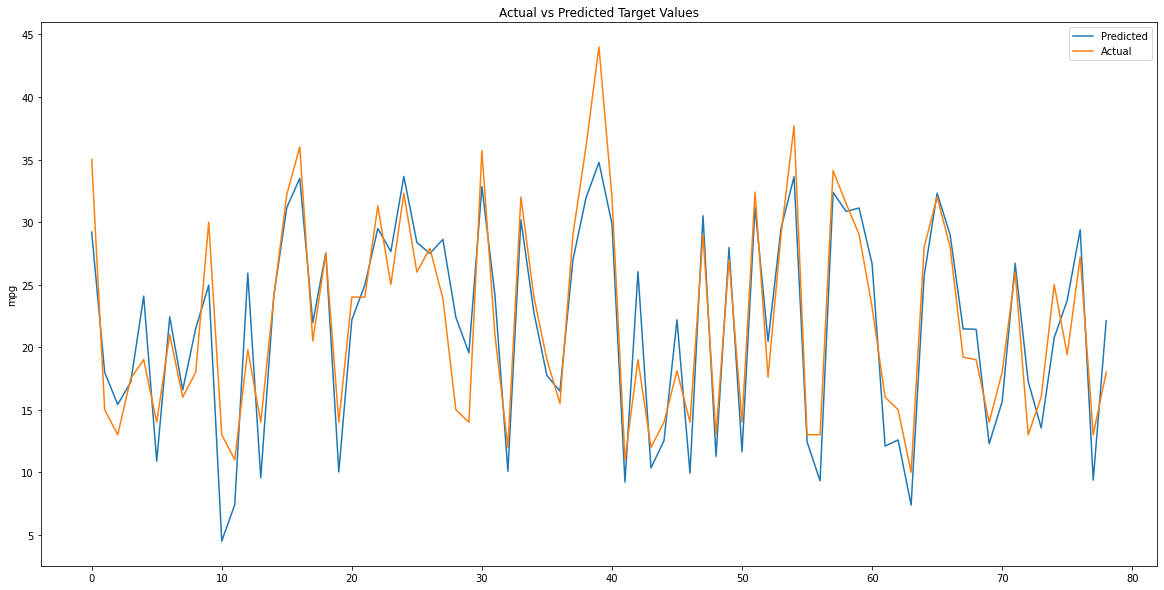

In [29]:
clf = LinearRegression(normalize=True)
build_model(clf, ['horsepower','displacement','weight', 'acceleration','cylinders','age'],'mpg', df)